# Fake News Detection using Machine Learning and Deep Learning

### Importing neccessary libraries and Loading the Dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import xgboost as xgb
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,auc, classification_report, RocCurveDisplay
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

In [2]:
news_df = pd.read_csv('feverous.csv', names=["ID", "label", "claim", "evidence", "annotator_operations", "expected_challenge", "challenge"])

In [3]:
news_df = news_df.drop(0)

In [4]:
encoder = LabelEncoder()

news_df['label'] = encoder.fit_transform(news_df['label'])

In [5]:
news_df.head()

,ID,label,claim,evidence,annotator_operations,expected_challenge,challenge
1,24435.0,1,Michael Folivi competed with ten teams from 20...,"[{'content': ['Michael Folivi_cell_1_2_0', 'Mi...","[{'operation': 'start', 'value': 'start', 'tim...",NaN,Numerical Reasoning
2,14802.0,2,Asiatic Society of Bangladesh(housed in Nimtal...,[{'content': ['Asiatic Society of Bangladesh_s...,"[{'operation': 'start', 'value': 'start', 'tim...",NaN,Other
3,28540.0,2,"Lindfield railway station has 3 bus routes, in...",[{'content': ['Lindfield railway station_sente...,"[{'operation': 'start', 'value': 'start', 'tim...",NaN,Other
4,71874.0,2,Mukaradeeb('Wolf's Den') is a city in Iraq nea...,"[{'content': ['Mukaradeeb_sentence_1', 'Mukara...","[{'operation': 'start', 'value': 'start', 'tim...",NaN,Combining Tables and Text
5,70296.0,2,Herbivore men was coined by Maki Fukasawa and ...,"[{'content': ['Herbivore men_sentence_1', 'Her...","[{'operation': 'start', 'value': 'start', 'tim...",NaN,Multi-hop Reasoning


In [6]:
news_df.shape

(71291, 7)

<AxesSubplot:xlabel='label', ylabel='count'>

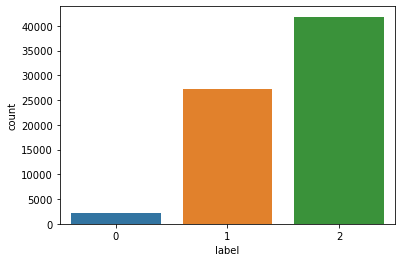

In [7]:
sns.countplot(x='label', data=news_df)

### Data Preprocessing

In [8]:
news_df.isna().sum()

ID                          0
label                       0
claim                       0
evidence                    0
annotator_operations        0
expected_challenge      71291
challenge                   0
dtype: int64

In [9]:
news_df = news_df.fillna(' ')

In [10]:
news_df.isna().sum()

ID                      0
label                   0
claim                   0
evidence                0
annotator_operations    0
expected_challenge      0
challenge               0
dtype: int64

In [11]:
news_df['content'] = news_df['claim']

In [12]:
news_df

,ID,label,claim,evidence,annotator_operations,expected_challenge,challenge,content
1,24435.0,1,Michael Folivi competed with ten teams from 20...,"[{'content': ['Michael Folivi_cell_1_2_0', 'Mi...","[{'operation': 'start', 'value': 'start', 'tim...",,Numerical Reasoning,Michael Folivi competed with ten teams from 20...
2,14802.0,2,Asiatic Society of Bangladesh(housed in Nimtal...,[{'content': ['Asiatic Society of Bangladesh_s...,"[{'operation': 'start', 'value': 'start', 'tim...",,Other,Asiatic Society of Bangladesh(housed in Nimtal...
3,28540.0,2,"Lindfield railway station has 3 bus routes, in...",[{'content': ['Lindfield railway station_sente...,"[{'operation': 'start', 'value': 'start', 'tim...",,Other,"Lindfield railway station has 3 bus routes, in..."
4,71874.0,2,Mukaradeeb('Wolf's Den') is a city in Iraq nea...,"[{'content': ['Mukaradeeb_sentence_1', 'Mukara...","[{'operation': 'start', 'value': 'start', 'tim...",,Combining Tables and Text,Mukaradeeb('Wolf's Den') is a city in Iraq nea...
5,70296.0,2,Herbivore men was coined by Maki Fukasawa and ...,"[{'content': ['Herbivore men_sentence_1', 'Her...","[{'operation': 'start', 'value': 'start', 'tim...",,Multi-hop Reasoning,Herbivore men was coined by Maki Fukasawa and ...
...,...,...,...,...,...,...,...,...
71287,40197.0,2,"Monica Frassoni, European Green Party Spokespe...","[{'content': ['Monica Frassoni_cell_0_5_1'], '...","[{'operation': 'start', 'value': 'start', 'tim...",,Other,"Monica Frassoni, European Green Party Spokespe..."
71288,28692.0,2,"Emil Roy was a native of Brighton, Massachuset...","[{'content': ['Emil Roy_sentence_3', 'Emil Roy...","[{'operation': 'start', 'value': 'start', 'tim...",,Other,"Emil Roy was a native of Brighton, Massachuset..."
71289,43014.0,1,Francisco Antonio Zea began studying in Medell...,[{'content': ['Francisco Antonio Zea_sentence_...,"[{'operation': 'start', 'value': 'start', 'tim...",,Other,Francisco Antonio Zea began studying in Medell...
71290,22198.0,2,"Vernors, originally sold as Vernor’s, moved it...","[{'content': ['Vernors_sentence_11', 'Vernors_...","[{'operation': 'start', 'value': 'start', 'tim...",,Other,"Vernors, originally sold as Vernor’s, moved it..."


In [13]:
news_df['content']

1        Michael Folivi competed with ten teams from 20...
2        Asiatic Society of Bangladesh(housed in Nimtal...
3        Lindfield railway station has 3 bus routes, in...
4        Mukaradeeb('Wolf's Den') is a city in Iraq nea...
5        Herbivore men was coined by Maki Fukasawa and ...
                               ...                        
71287    Monica Frassoni, European Green Party Spokespe...
71288    Emil Roy was a native of Brighton, Massachuset...
71289    Francisco Antonio Zea began studying in Medell...
71290    Vernors, originally sold as Vernor’s, moved it...
71291    Convergenza per il Friuli, a strong supporter ...
Name: content, Length: 71291, dtype: object

#### Stemming

In [14]:
# stemming
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
news_df['content'] = news_df['content'].apply(stemming)

In [16]:
news_df['content']

1        michael folivi compet ten team appear game mak...
2        asiat societi bangladesh hous nimtali non poli...
3        lindfield railway station bu rout first platfo...
4        mukaradeeb wolf den citi iraq near syrian bord...
5        herbivor men coin maki fukasawa neg connot you...
                               ...                        
71287    monica frassoni european green parti spokesper...
71288    emil roy nativ brighton massachusett play summ...
71289    francisco antonio zea began studi medellin dro...
71290    vernor origin sold vernor move bottl plant hea...
71291    convergenza per il friuli strong support friul...
Name: content, Length: 71291, dtype: object

In [17]:
X = news_df['content'].values
y = news_df['label'].values

In [18]:
print(X)

['michael folivi compet ten team appear game make seven goal total'
 'asiat societi bangladesh hous nimtali non polit organ renam ahm hasan dani play import role found'
 'lindfield railway station bu rout first platform servic rout emu plain via central richmond hornbi via strathfield'
 ... 'francisco antonio zea began studi medellin drop later'
 'vernor origin sold vernor move bottl plant headquart new locat due construct cobo hall'
 'convergenza per il friuli strong support friuli autonomi teach friulian languag region green centrist polit parti head udin mayor sergio cecotti']


#### Applying Tf-idf Vectorizer

In [19]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [20]:
print(X)

  (0, 52059)	0.22800277679670436
  (0, 50868)	0.2634945905563091
  (0, 50677)	0.19587377422395605
  (0, 46235)	0.27663373823167486
  (0, 32970)	0.31701864946402897
  (0, 30985)	0.30245277799070336
  (0, 19656)	0.2514092838024555
  (0, 18606)	0.22440188348320111
  (0, 17711)	0.5665365555202247
  (0, 10707)	0.2874529159058384
  (0, 2506)	0.23357736629462783
  (1, 47774)	0.2201351706134059
  (1, 43874)	0.184901423795822
  (1, 43010)	0.26263094196689774
  (1, 40351)	0.194270253701964
  (1, 40103)	0.11913589046218642
  (1, 37519)	0.19275570595065675
  (1, 36245)	0.20772384291827276
  (1, 36014)	0.38999126706851445
  (1, 23713)	0.22881899302491315
  (1, 22843)	0.17644161502130193
  (1, 21405)	0.30558583308171694
  (1, 17910)	0.14081998738857598
  (1, 12290)	0.31535760063587664
  (1, 4317)	0.27867568768876144
  :	:
  (71289, 21000)	0.20051138991283873
  (71289, 14437)	0.19987826670255082
  (71289, 10970)	0.2034779881367884
  (71289, 10370)	0.3419909264218115
  (71289, 6561)	0.2791925263803206

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [22]:
X_train.shape

(57032, 57885)

In [23]:
X_test.shape

(14259, 57885)

### Applying ML models

#### Logistic Regression

C:\Users\shruti29\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shruti29\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shruti29\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shruti29\anaconda3\lib\site-packages\

Confusion Matrix:
 [[   0  116  332]
 [   0 1936 3507]
 [   0 1360 7008]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       448
           1       0.57      0.36      0.44      5443
           2       0.65      0.84      0.73      8368

    accuracy                           0.63     14259
   macro avg       0.40      0.40      0.39     14259
weighted avg       0.60      0.63      0.59     14259

Accuracy: 0.6272529630408865
Precision: 0.5957488220273122
Recall: 0.6272529630408865
F1-Score: <function f1_score at 0x00000253ECCB6F70>


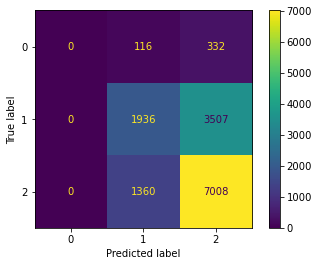

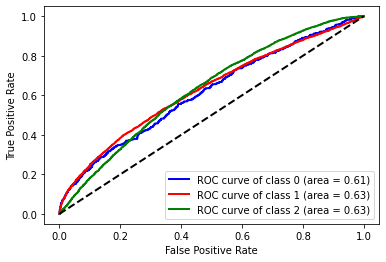

In [24]:
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_prob = model.decision_function(X_test)
n_classes = len(model.classes_)
y_test_bin = label_binarize(y_test, classes=model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Machine

Confusion Matrix:
 [[   4   95  349]
 [   8 1752 3683]
 [   4 1096 7268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.01      0.02       448
           1       0.60      0.32      0.42      5443
           2       0.64      0.87      0.74      8368

    accuracy                           0.63     14259
   macro avg       0.50      0.40      0.39     14259
weighted avg       0.61      0.63      0.59     14259

Accuracy: 0.6328634546602147
Precision: 0.6125574292122891
Recall: 0.6328634546602147
F1-Score: <function f1_score at 0x00000253ECCB6F70>


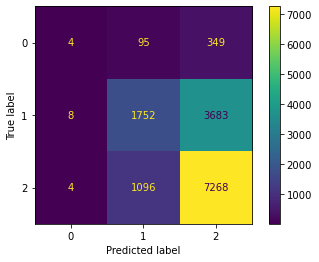

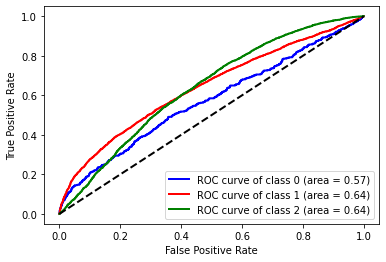

In [25]:
svm_model = OneVsRestClassifier(SVC(kernel='linear'))
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_prob = svm_model.decision_function(X_test)
n_classes = len(svm_model.classes_)
y_test_bin = label_binarize(y_test, classes=svm_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Naive Bayes

Confusion Matrix:
 [[   0   47  401]
 [   0  803 4640]
 [   0  529 7839]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       448
           1       0.58      0.15      0.24      5443
           2       0.61      0.94      0.74      8368

    accuracy                           0.61     14259
   macro avg       0.40      0.36      0.32     14259
weighted avg       0.58      0.61      0.52     14259

Accuracy: 0.6060733571779228
Precision: 0.5794520785871344
Recall: 0.6060733571779228
F1-Score: <function f1_score at 0x00000253ECCB6F70>


C:\Users\shruti29\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shruti29\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shruti29\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shruti29\anaconda3\lib\site-packages\

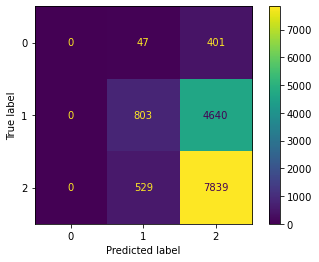

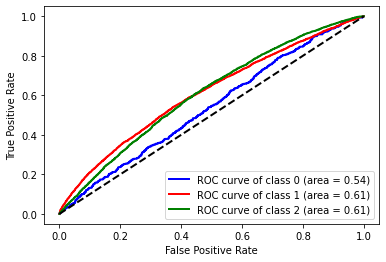

In [26]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted', zero_division = 1)
y_prob = NB.predict_proba(X_test)
n_classes = len(NB.classes_)
y_test_bin = label_binarize(y_test, classes=NB.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

Confusion Matrix:
 [[  89   76  283]
 [ 568 1642 3233]
 [ 992 1837 5539]]

Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.20      0.08       448
           1       0.46      0.30      0.36      5443
           2       0.61      0.66      0.64      8368

    accuracy                           0.51     14259
   macro avg       0.38      0.39      0.36     14259
weighted avg       0.54      0.51      0.52     14259

Accuracy: 0.509853425906445
Precision: 0.5369924659561826
Recall: 0.509853425906445
F1-Score: <function f1_score at 0x00000253ECCB6F70>


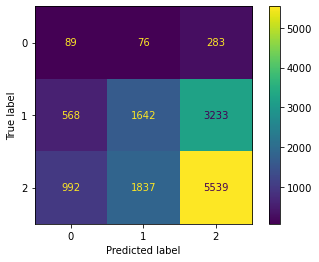

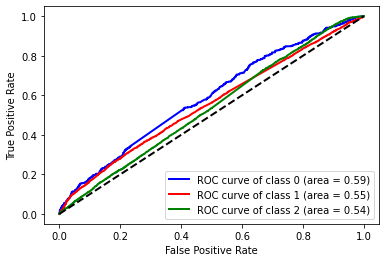

In [27]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy', random_state=42, class_weight='balanced', bootstrap=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_prob = clf.predict_proba(X_test)
n_classes = len(clf.classes_)
y_test_bin = label_binarize(y_test, classes=clf.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Passive Aggressive Algorithm

Confusion Matrix:
 [[  32  171  245]
 [  90 2834 2519]
 [ 168 2594 5606]]

Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.07      0.09       448
           1       0.51      0.52      0.51      5443
           2       0.67      0.67      0.67      8368

    accuracy                           0.59     14259
   macro avg       0.43      0.42      0.42     14259
weighted avg       0.59      0.59      0.59     14259

Accuracy: 0.5941510624868505
Precision: 0.5897421764276519
Recall: 0.5941510624868505
F1-Score: <function f1_score at 0x00000253ECCB6F70>


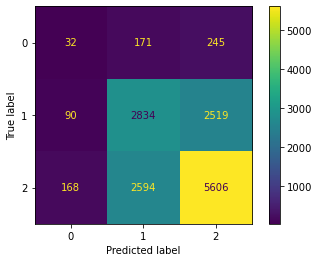

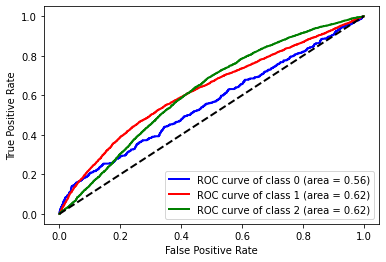

In [28]:
clf = PassiveAggressiveClassifier(max_iter=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_prob = clf.decision_function(X_test)
n_classes = len(clf.classes_)
y_test_bin = label_binarize(y_test, classes=clf.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree

Confusion Matrix:
 [[   0   10  438]
 [   1  364 5078]
 [   0   52 8316]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       448
           1       0.85      0.07      0.12      5443
           2       0.60      0.99      0.75      8368

    accuracy                           0.61     14259
   macro avg       0.49      0.35      0.29     14259
weighted avg       0.68      0.61      0.49     14259

Accuracy: 0.6087383406971035
Precision: 0.6789950104378181
Recall: 0.6087383406971035
F1-Score: <function f1_score at 0x00000253ECCB6F70>


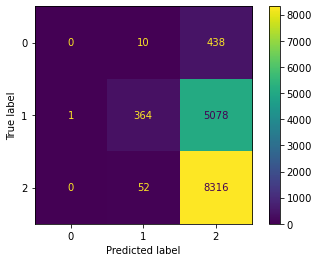

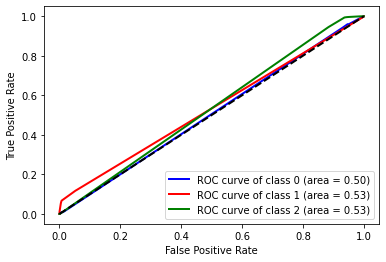

In [29]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
y_prob = clf.predict_proba(X_test)
n_classes = len(clf.classes_)
y_test_bin = label_binarize(y_test, classes=clf.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()